# *Website Modeling and Analysis Report*
*Chip*

In [14]:
import csv
from IPython.display import Image

### NBA-Wide Analysis ###

** Baseline Model **

The baseline logistic regression model on the entire dataset returns a very small coefficient and one that is insignificant with a large standard error as you can see in the below output.

In [15]:
with open('baseline_model.csv', 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        print row

['                    Logit Regression Results                   ']
['Dep. Variable:', 'fgm             ', '  No. Observations:  ', '118033   ']
['Model:        ', 'Logit           ', '  Df Residuals:      ', '118032   ']
['Method:       ', 'MLE             ', '  Df Model:          ', '     0   ']
['Date:         ', 'Sun', ' 11 Dec 2016', '  Pseudo R-squ.:     ', '-0.005983']
['Time:         ', '19:20:28        ', '  Log-Likelihood:    ', ' -81814. ']
['converged:    ', 'True            ', '  LL-Null:           ', ' -81328. ']
['              ', '                ', '  LLR p-value:       ', '   nan   ']
['               ', '   coef   ', ' std err ', '    z    ', 'P>|z| ', ' [95.0% Conf. Int.]']
['previous_streak', '    0.0009', '    0.003', '    0.319', ' 0.750', '   -0.005     0.007']


Using this model, the classification rate on a test set is only %54. Considering the fact that only about %45 of shots go in, a model that predicts every shot misses has a classification rate of %55 so our model is not performing much better than an arbitrary baseline. Some figures of the baseline image are shown below:

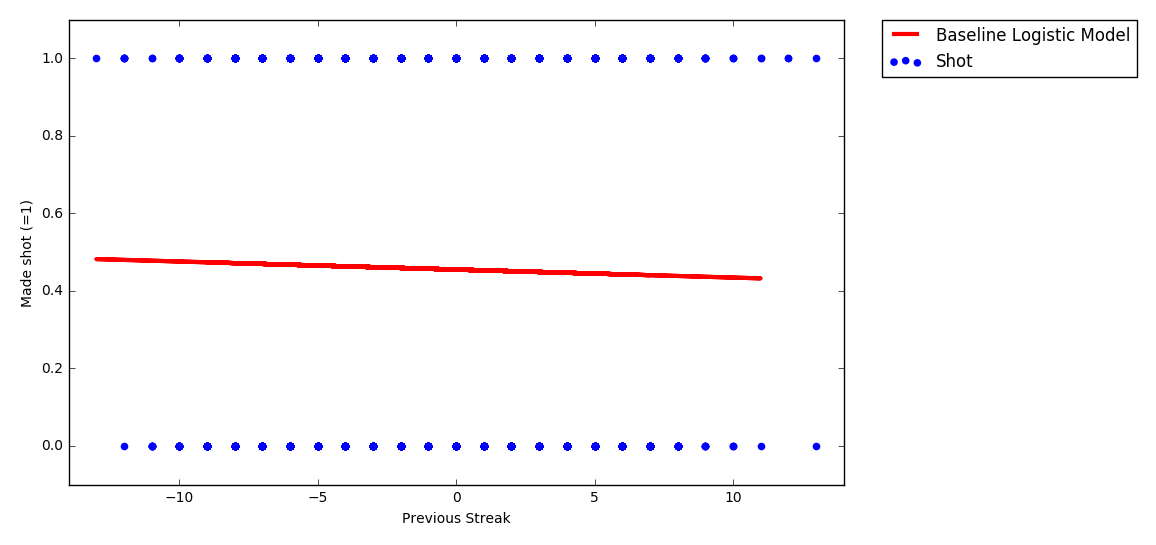

In [19]:
Image(filename='baseline_logit.png')

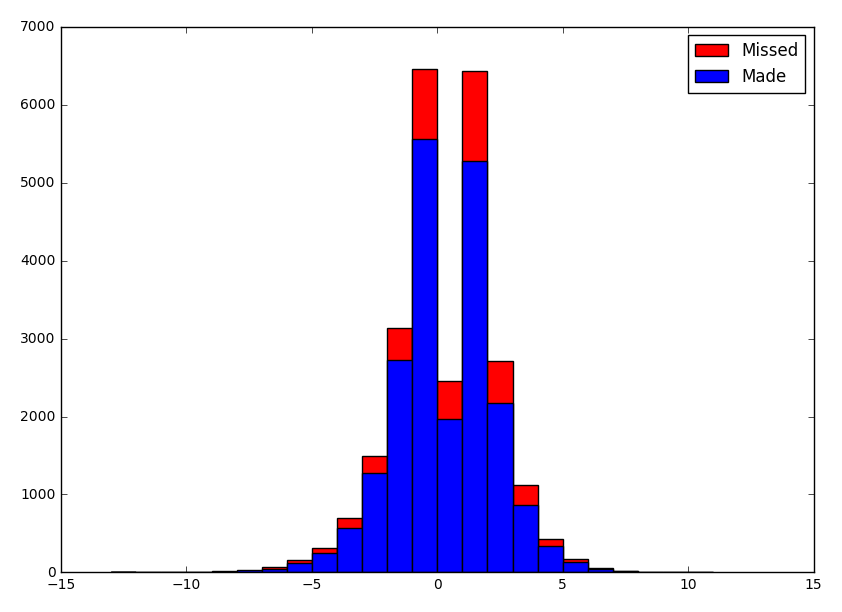

In [18]:
Image(filename='streak_distributions.png')

The above figures demonstrate how difficult it is to build a useful model with only the $previous\_streak$ variable. The first image displays the logit model and how it would predict whether a shot was made or not depending on the current value of $previous_streak$. If $previous\_streak$ had a strong correlation with whether the shot was made or not, then the line would have a more dramatic slope.

The histogram figures displays the distribution of the $previous\_streak$ variable depending on whether the sot was missed or made. The distributions appear to be almost identical whether the shot is missed or made with the quantity of shots missed being greater than the amount made at about each value of $previous\_streak$.

If $previous\_streak$ were more likely to be associated with a made shot, then we would see the made distribution more shifted to the right and the missed distribution more shifted to the left in the above figure, but this is obviously not the case and is what is driving the above results in the baseline model.

** Robust model **

Adding in more predictors improves both the model's accuracy as well as the significance of the $previous_streak$ variable (regression results displayed below). This model implies that for an increase in streak of one unit, this only affects the probability of making the next shot by about or less than 1%. Furthermore, this effect on probability is a decrease, i.e. the exact opposite of what we expect to see if the hot hand were true. If anything, a shooter on a streak becomes less likely to make their next shot. These results remain similar if we restrict the $previous_streak$ variable to just positive values.

As we add more predictors, the classification rate improves with the biggest jump due to the addition of the shot distance variable.

['                   Logit Regression Results                   ']
['Dep. Variable:', 'y               ', '  No. Observations:  ', '118033  ']
['Model:        ', 'Logit           ', '  Df Residuals:      ', '118025  ']
['Method:       ', 'MLE             ', '  Df Model:          ', '     7  ']
['Date:         ', 'Sun', ' 11 Dec 2016', '  Pseudo R-squ.:     ', '0.04175 ']
['Time:         ', '19:53:09        ', '  Log-Likelihood:    ', ' -77932.']
['converged:    ', 'True            ', '  LL-Null:           ', ' -81328.']
['              ', '                ', '  LLR p-value:       ', ' 0.000  ']
['               ', '   coef   ', ' std err ', '    z    ', 'P>|z| ', ' [95.0% Conf. Int.]']
['previous_streak', '   -0.0094', '    0.003', '   -3.133', ' 0.002', '   -0.015    -0.004']
['final_margin   ', '    0.0092', '    0.000', '   19.886', ' 0.000', '    0.008     0.010']
['dribbles       ', '    0.0330', '    0.005', '    7.067', ' 0.000', '    0.024     0.042']
['touch_time     ', '   -0

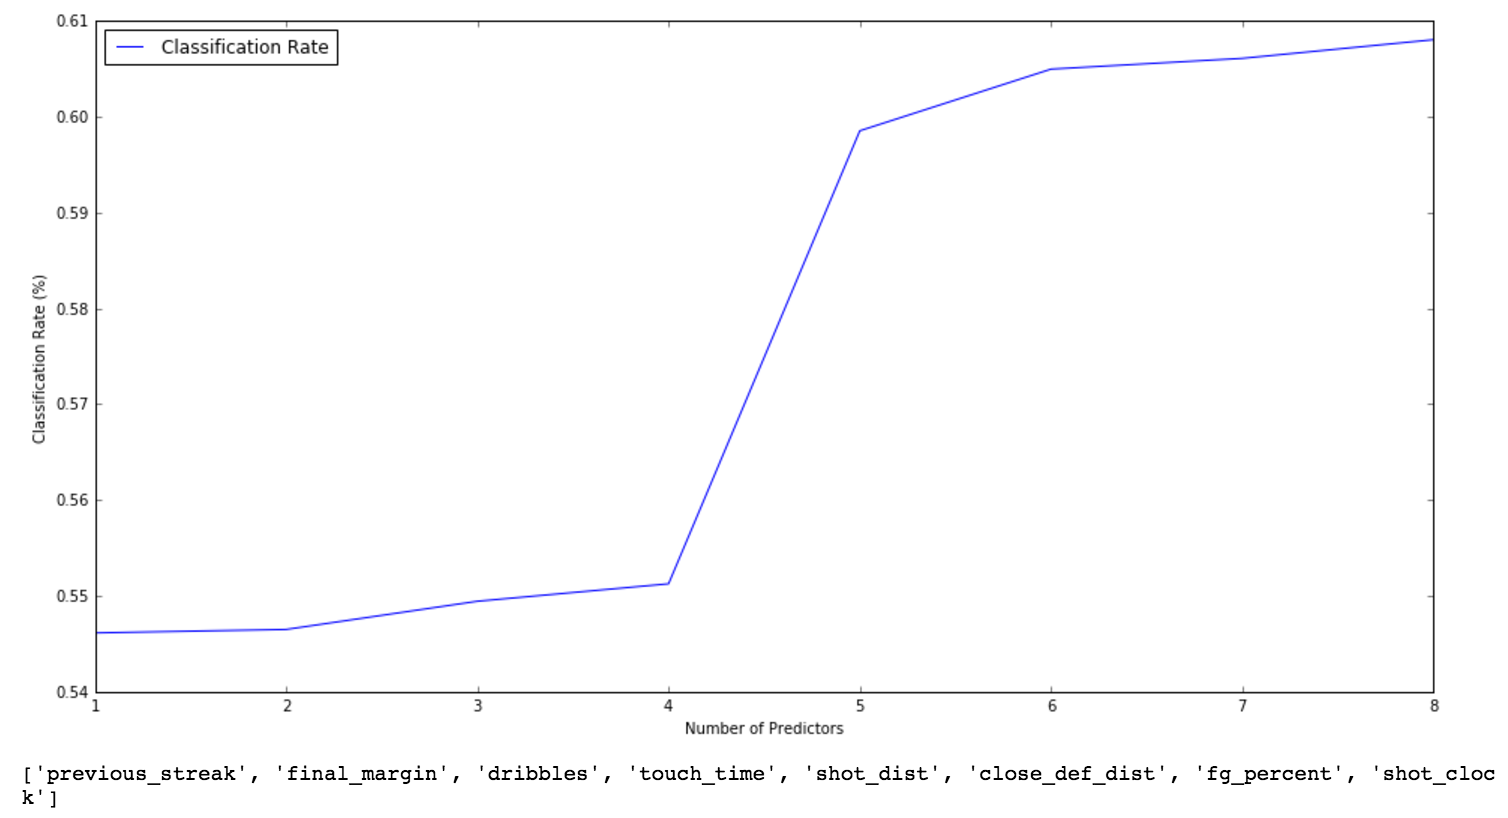

In [24]:
with open('robust_model.csv', 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        print row

Image(filename='class_rate_predictors.png')

** Fixed Effects Analysis **

In order to control for defender ability, the conditions of specific games, and the ability of certain shooters, we added fixed effects for defenders, games, and players. None of these fixed effects improved the performance of our model or affected the qualitative interpretation of the $previous_streak$ variable's role in the model.

### Individual Player Analysis ###

** The hot hand effect varies for our top 20 players. ** If we fit models for individual players, the hot hand effect varies in both magnitude and sign. There is about an equal distribution of negative and positive estimated coefficients which resonates with our finding that the streak metric is generally an estimated zero when the model is run on the whole dataset. These are visualized in graphical and tabular images below.

Unfortunately, most of these estimates have p-values greater than .05 or .1 indicating that our estimates are not significant. Interestingly enough though is that the only player to have a significant estimate is Steph Curry (likely because he takes a large amount of shots). Steph's hot hand effect is estimated to be a negative coefficient though that implies as Steph makes an additional shot in a streak, his probability of making the next shot decreases by about 8% (which is pretty significant in magnitude). The player with the largest positive hot hand effect is Derrick Rose whose probability of making the next shot increases by about 5% for each additional shot he makes in a streak.

Furthermore, it is important to consider multiple hypothesis testing as we create seperate models for each player. Because the player's estimates are likely independent, we can choose our cut off value of significance as $.05/20 = 0.00256$. This would imply that none of our estimates are significant. In the future, it may be useful to have data on players from multiple seasons and with additional observations, we may gain greater statistical percision.

['', 'Player Name', 'Previous Streak Coefficient', 'p-Value', 'Pseudo R^2']
['0', 'lebron james', '-0.0537881979139', '0.116218127937', '0.0882355882896']
['1', 'damian lillard', '0.0299570932766', '0.335785802213', '0.0549934857086']
['2', 'russell westbrook', '-0.0376355519373', '0.252756222297', '0.063785723483']
['3', 'james harden', '0.0260540384177', '0.350140388868', '0.0439483369995']
['4', 'carmelo anthony', '-0.0520518407993', '0.157199409519', '0.0425258515741']
['5', 'stephen curry', '-0.0750044964831', '0.0364620420001', '0.0519291506761']
['6', 'kobe bryant', '-0.00195483567107', '0.954770869483', '0.0475017858855']
['7', 'derrick rose', '0.0512451980421', '0.114370326463', '0.0477970570725']
['8', 'kyrie irving', '-0.0224597557153', '0.485582693774', '0.0247236551915']
['9', 'kemba walker', '-0.00834829837979', '0.820582107776', '0.040961387403']
['10', 'tyreke evans', '0.0221296211575', '0.500243278627', '0.0563028475732']
['11', 'klay thompson', '0.016384066842', '0.58

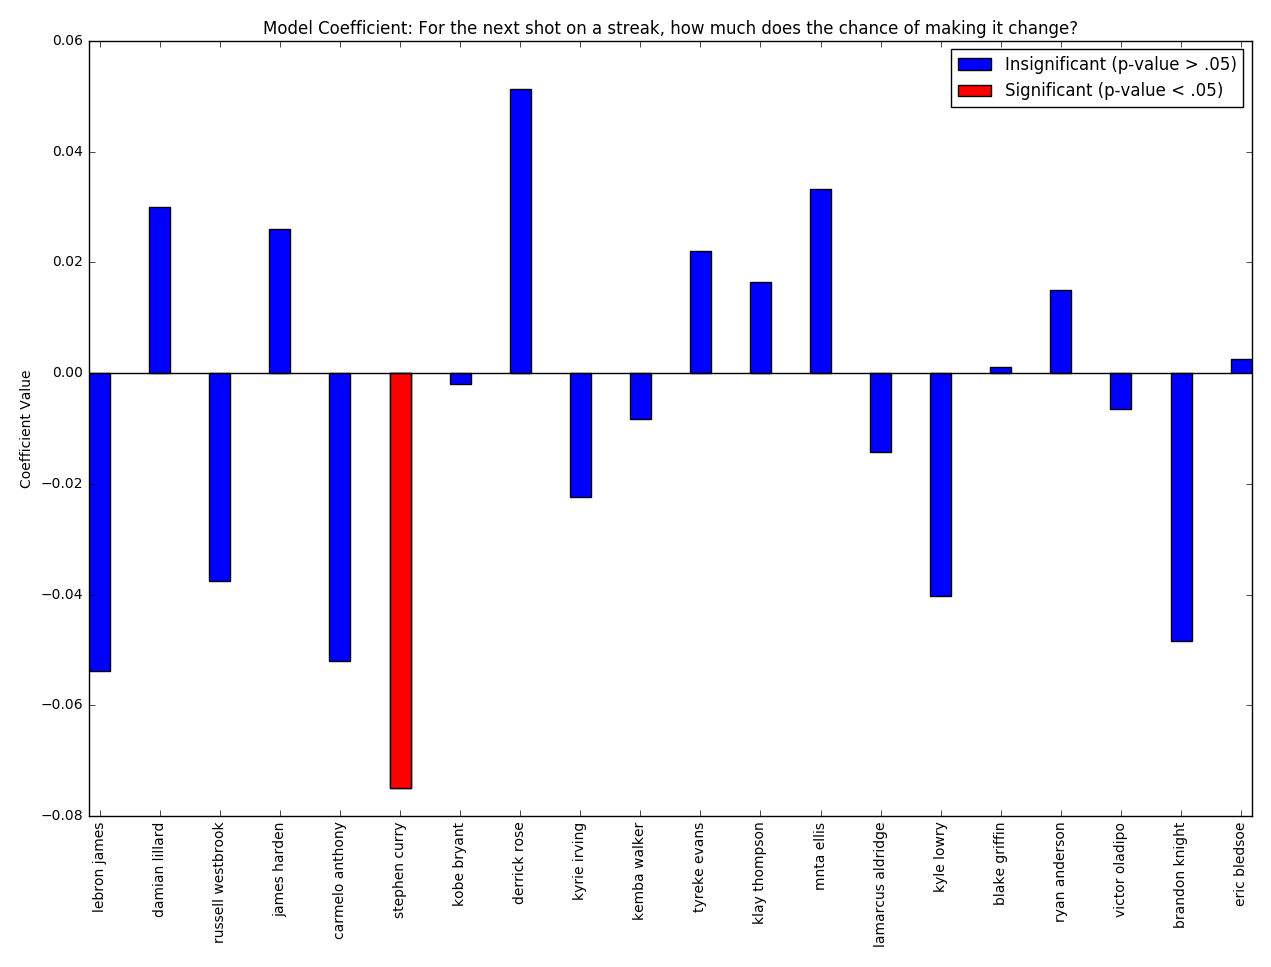

In [32]:
with open('individual_models.csv', 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        print row

Image(filename='player_coefficients.png')